In [32]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import os
import numpy as np

In [33]:
base = os.path.abspath('.')
soil = os.path.join(base, "dataset/BareSoilPolyPtsTS.csv")
farmland = os.path.join(base, "dataset/FarmPolyPtsTS.csv")
water = os.path.join(base, "dataset/WaterPolyPtsTS.csv")

allpoints = os.path.join(base, "dataset/allpoints.csv")

In [13]:
s_df = pd.read_csv(soil)
f_df = pd.read_csv(farmland)
w_df = pd.read_csv(water)

In [14]:
s_df['type'] = 'soil'
w_df['type'] = 'water'
f_df['type'] = 'farmland'

s_df.shape


(3384, 18)

In [15]:
w_df.shape


(5400, 18)

In [16]:
f_df.shape


(4338, 18)

In [17]:
data = pd.concat([f_df, s_df, w_df], ignore_index=True)

In [18]:
data.loc[data['type'] =='water']

,system:index,BRIGHTI,BSI,GNDVI,NDDI,NDPI,NDVI,NDWI,RedEdge1,SRRE,SWI,count,date,dateYMD,numbImages,timestamp,.geo,type
7722,0_0,0.668176,0.096026,-0.288921,-21.090195,-0.237545,-0.262763,0.288921,-0.291438,0.548662,0.217778,23,2019-01-01,2019-01-01,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.37243925...",water
7723,0_1,0.903811,0.108492,0.058413,0.124639,-0.094780,-0.074990,-0.058413,-0.097158,0.822892,0.246254,23,2019-01-01,2019-01-01,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.32666524...",water
7724,0_2,0.926441,0.185817,-0.100253,2.569627,-0.150542,-0.230441,0.100253,-0.283681,0.558020,0.328992,23,2019-01-01,2019-01-01,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.27055557...",water
7725,0_3,1.120584,0.059353,0.340483,-2.370296,0.032754,0.138434,-0.340483,0.040867,1.085217,0.283992,23,2019-01-01,2019-01-01,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.39143156...",water
7726,0_4,0.923038,-0.181179,0.159857,-1.511291,-0.783193,0.032280,-0.159857,-0.020583,0.959664,0.844812,23,2019-01-01,2019-01-01,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.28788290...",water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13117,26_295,0.869735,0.009515,0.100077,-0.893215,-0.177537,-0.005510,-0.100077,0.009399,1.018976,0.262088,23,2019-12-31,2019-12-31,1,1577750400000,"{""type"":""Polygon"",""coordinates"":[[[27.31105898...",water
13118,26_296,1.146723,-0.039568,0.363443,-2.223051,0.128725,0.137916,-0.363443,0.041484,1.086559,0.137154,23,2019-12-31,2019-12-31,1,1577750400000,"{""type"":""Polygon"",""coordinates"":[[[27.39119116...",water
13119,26_297,0.864927,-0.079189,0.009499,0.810923,-0.734594,-0.090980,-0.009499,-0.138858,0.756145,0.796108,23,2019-12-31,2019-12-31,1,1577750400000,"{""type"":""Polygon"",""coordinates"":[[[27.32741440...",water
13120,26_298,0.878833,-0.136999,0.133718,-1.534578,-0.701571,0.028203,-0.133718,-0.036436,0.929690,0.778426,23,2019-12-31,2019-12-31,1,1577750400000,"{""type"":""Polygon"",""coordinates"":[[[27.32759030...",water


In [25]:
waterIdx = data.loc[data['type'] =='water'][['SWI', 'NDWI', 'NDPI', 'NDDI']]
soilIdx = data.loc[data['type'] =='soil'][['BSI', 'BRIGHTI']]
farmIdx = data.loc[data['type'] =='farmland'][['NDVI', 'GNDVI', 'RedEdge1', 'SRRE']]


textIdx = data[['NDVI', 'GNDVI', 'RedEdge1', 'SRRE', 'BSI', 'BRIGHTI', 'NDWI', 'SWI', 'NDPI', 'NDDI']]

In [26]:
waterIdx.head()

,SWI,NDWI,NDPI,NDDI
7722,0.217778,0.288921,-0.237545,-21.090195
7723,0.246254,-0.058413,-0.094780,0.124639
7724,0.328992,0.100253,-0.150542,2.569627
7725,0.283992,-0.340483,0.032754,-2.370296
7726,0.844812,-0.159857,-0.783193,-1.511291


In [27]:
corrMatrixW = waterIdx.corr()
print (corrMatrixW)

corrMatrixS = soilIdx.corr()
print (corrMatrixS)

corrMatrixF = farmIdx.corr()
print (corrMatrixF)

           SWI      NDWI      NDPI      NDDI
SWI   1.000000  0.448297 -0.992430  0.217150
NDWI  0.448297  1.000000 -0.508520  0.221996
NDPI -0.992430 -0.508520  1.000000 -0.200934
NDDI  0.217150  0.221996 -0.200934  1.000000
              BSI   BRIGHTI
BSI      1.000000  0.653457
BRIGHTI  0.653457  1.000000
              NDVI     GNDVI  RedEdge1      SRRE
NDVI      1.000000  0.900733  0.970941  0.968742
GNDVI     0.900733  1.000000  0.859919  0.856054
RedEdge1  0.970941  0.859919  1.000000  0.996764
SRRE      0.968742  0.856054  0.996764  1.000000


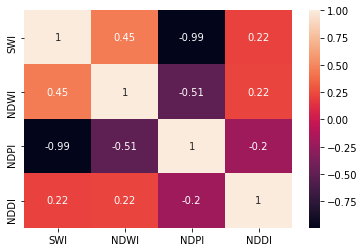

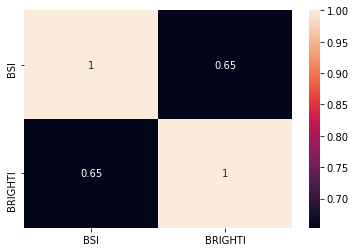

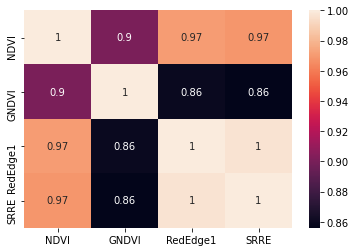

In [28]:

sn.heatmap(corrMatrixW, annot=True)
plt.show()
sn.heatmap(corrMatrixS, annot=True)
plt.show()
sn.heatmap(corrMatrixF, annot=True)
plt.show()

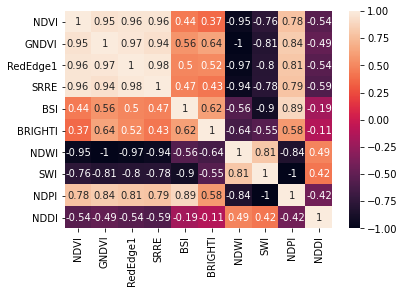

In [29]:

corrMatrixtextID = textIdx.corr()
sn.heatmap(corrMatrixtextID, annot=True)

plt.show()


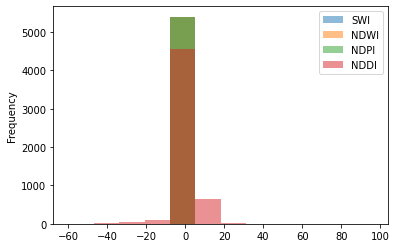

In [30]:
ax = waterIdx.plot.hist(bins=12, alpha=0.5)

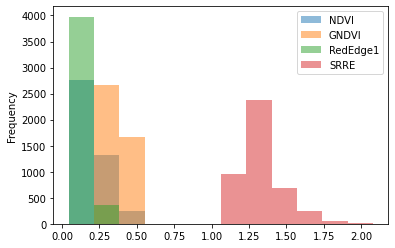

In [166]:
ax = farmIdx.plot.hist(bins=12, alpha=0.5)

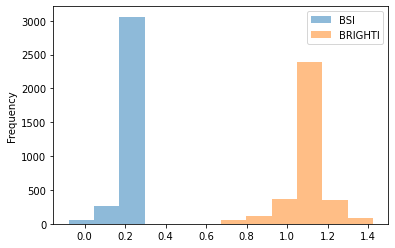

In [167]:
ax = soilIdx.plot.hist(bins=12, alpha=0.5)

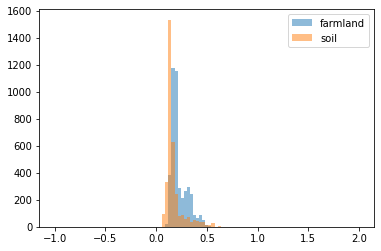

In [168]:
selected = 'NDVI'
excludeW = data.loc[data['type'] !='water']#[['BSI', 'type']]
fbsi = excludeW.loc[excludeW['type']=='farmland'][[selected]][selected].tolist()
sbsi = excludeW.loc[excludeW['type']=='soil'][[selected]][selected].tolist()

bins = np.linspace(-1, 2, 100)

plt.hist(fbsi, bins, alpha=0.5, label='farmland')
plt.hist(sbsi, bins, alpha=0.5, label='soil')
plt.legend(loc='upper right')
plt.show()


In [172]:
fbsi = excludeW.loc[excludeW['type']=='farmland'][[selected]]
sbsi = excludeW.loc[excludeW['type']=='soil'][[selected]]

In [173]:
fbsi

,NDVI
0,0.160896
1,0.320065
2,0.304806
3,0.188965
4,0.263813
...,...
4333,0.174708
4334,0.166778
4335,0.155283
4336,0.266937


In [174]:
sbsi

,NDVI
4338,0.171079
4339,0.162643
4340,0.364085
4341,0.149758
4342,0.161644
...,...
7717,0.209729
7718,0.199635
7719,0.132706
7720,0.208717


In [37]:
all_df = pd.read_csv(allpoints, encoding='utf-8', sep=',')
all_df.head()

,system:index,BRIGHTI,BSI,GNDVI,NDDI,NDPI,NDVI,NDWI,RedEdge1,SRRE,SWI,count,date,dateYMD,ld_type,numbImages,timestamp,.geo
0,0_1_1_0,0.668176,0.096026,-0.288921,-21.090195,-0.237545,-0.262763,0.288921,-0.291438,0.548662,0.217778,23,2019-01-01,2019-01-01,water,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.37243925..."
1,0_1_1_1,0.929218,0.209793,0.074196,-0.064970,0.210968,-0.065143,-0.074196,-0.151452,0.736937,0.012774,23,2019-01-01,2019-01-01,water,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.27030131..."
2,0_1_1_2,0.926441,0.185817,-0.100253,2.569627,-0.150542,-0.230441,0.100253,-0.283681,0.558020,0.328992,23,2019-01-01,2019-01-01,water,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.27055557..."
3,0_1_1_3,0.876237,0.057851,0.164590,-2.896626,-0.079213,0.080112,-0.164590,0.000000,1.000000,0.220171,23,2019-01-01,2019-01-01,water,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.31101573..."
4,0_1_1_4,0.911410,-0.068030,0.055698,0.144341,-0.685248,-0.066617,-0.055698,-0.109691,0.802303,0.765603,23,2019-01-01,2019-01-01,water,1,1546300800000,"{""type"":""Polygon"",""coordinates"":[[[27.32772756..."


In [40]:
subwaterall_df = all_df[all_df['ld_type']=='water'][['NDDI', 'NDPI', 'NDWI', 'SWI']]
subwaterall_df

,NDDI,NDPI,NDWI,SWI
0,-21.090195,-0.237545,0.288921,0.217778
1,-0.064970,0.210968,-0.074196,0.012774
2,2.569627,-0.150542,0.100253,0.328992
3,-2.896626,-0.079213,-0.164590,0.220171
4,0.144341,-0.685248,-0.055698,0.765603
...,...,...,...,...
15595,-1.921063,-0.802141,-0.185443,0.859275
15596,-1.903607,-0.739203,-0.186796,0.815674
15597,0.688840,-0.762452,-0.015067,0.816677
15598,0.823156,-0.824980,-0.009071,0.866949


           SWI      NDWI      NDPI      NDDI
SWI   1.000000  0.448297 -0.992430  0.217150
NDWI  0.448297  1.000000 -0.508520  0.221996
NDPI -0.992430 -0.508520  1.000000 -0.200934
NDDI  0.217150  0.221996 -0.200934  1.000000


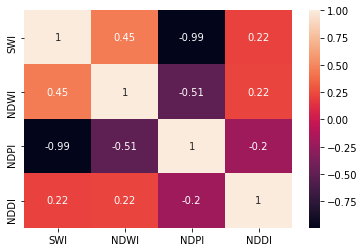

In [41]:
corrMatrixW = waterIdx.corr()
print (corrMatrixW)
sn.heatmap(corrMatrixW, annot=True)
plt.show()